In [1]:
using Plots, LinearAlgebra, MatrixDepot, IterativeSolvers, BenchmarkTools, DelimitedFiles

┌ Info: verify download of index files...
└ @ MatrixDepot C:\Users\vgbfb\.julia\packages\MatrixDepot\GEDc3\src\MatrixDepot.jl:139
┌ Info: reading database
└ @ MatrixDepot C:\Users\vgbfb\.julia\packages\MatrixDepot\GEDc3\src\download.jl:23
┌ Info: adding metadata...
└ @ MatrixDepot C:\Users\vgbfb\.julia\packages\MatrixDepot\GEDc3\src\download.jl:67
┌ Info: adding svd data...
└ @ MatrixDepot C:\Users\vgbfb\.julia\packages\MatrixDepot\GEDc3\src\download.jl:69
┌ Info: writing database
└ @ MatrixDepot C:\Users\vgbfb\.julia\packages\MatrixDepot\GEDc3\src\download.jl:74
┌ Info: used remote sites are sparse.tamu.edu with MAT index and math.nist.gov with HTML index
└ @ MatrixDepot C:\Users\vgbfb\.julia\packages\MatrixDepot\GEDc3\src\MatrixDepot.jl:141


# MTH8107 Mathématiques de l'apprentissage Profond : Devoir 2
## Bertrand Toutée 1805477 et Victor Gaudreau-Blouin 

### Question 1

In [ ]:
function arnoldi(A,u,m)

# Application de la méthode d'Arnoldi sur la matrice A de dimensions m x n, qui
# forme un sous-espace de dimension m, en partant du vecteur initial u de
# dimension n.
# Retourne la base orthonormale de dimension m+1 et la matrice de Hessenberg
# supérieure H de dimensions (m+1) x m.

n = length(u)
Q = zeros(n,m+1)
H = zeros(m+1,m)
Q[:,1] = u/norm(u)
for j = 1:m
  v = A*Q[:,j]
  for i = 1:j
    H[i,j] = dot(Q[:,i],v)
    v -= H[i,j]*Q[:,i]
  end
  H[j+1,j] = norm(v)
  Q[:,j+1] = v/H[j+1,j]
end

return Q,H
end

### Question 2

In [ ]:
n_list = [1000,2000,3000,4000,5000,6000,7000,8000,9000];
nores_mem_list = zeros(9)
nores_iter_list = zeros(9)
res_mem_list = zeros(9)
res_iter_list = zeros(9)

for i in 1:9
    n = n_list[i]
    lambda = @. 10 + (1:n)
    A = triu(rand(n,n),1) + diagm(0=>lambda)
    b = rand(n);

    a = @allocated begin
    x, hist = gmres(A, b, log=true, restart=size(A, 2));
    end
    nores_iter_list[i] = hist.iters;
    nores_mem_list[i] = a;

    a = @allocated begin
    x, hist = gmres(A, b, log=true, restart=20);
    end
    res_iter_list[i] = hist.iters;
    res_mem_list[i] = a;
end
println(nores_mem_list);
println(res_mem_list);
println(nores_iter_list);
println(res_iter_list);

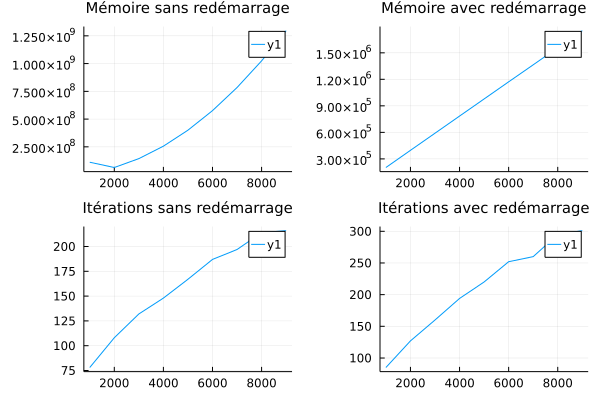

In [93]:
p1 = plot(n_list, nores_mem_list, title="Mémoire sans redémarrage", titlefontsize=10)
p2 = plot(n_list, res_mem_list, title="Mémoire avec redémarrage", titlefontsize=10)
p3 = plot(n_list, nores_iter_list, title="Itérations sans redémarrage", titlefontsize=10)
p4 = plot(n_list, res_iter_list, title="Itérations avec redémarrage", titlefontsize=10)
plot(p1,p2, p3, p4, layout = (2,2))

On observe que la mémoire utilisée par la méthode non redémarrée augmente rapidement et est significative, avec des allocations de l'ordre des 10^8 bytes pour des matrices de taille 1000. On a environ deux à trois ordres de grandeur d'écart pour l'espace mémoire aloué. On observe cepandant que la méthode redémarrée doit prendre beaucoup plus d'itérations, dans notre cas environ 1.5x.

2b

In [2]:
n=1000;
lambda = @. 10 + (1:n)
A = triu(rand(n,n),1) + diagm(0=>lambda);
b = rand(n);

a = @allocated begin
x, hist = gmres(A, b, log=true, restart=size(A, 2));
end
println(hist)

a = @allocated begin
x, hist = gmres(A, b, log=true, restart=50);
end
println(hist)

Converged after 79 iterations.
Converged after 81 iterations.


Si on peut se permettre d'augmenter k, on peut résoudre le systeme en moins d'opérations, par exemple ici où le k vaut 50 versus le 100 de la version non recommencée.

2c

In [4]:
n = 100
A = rand(n,n)
b = rand(n);

a = @allocated begin
x, hist = gmres(A, b, log=true, restart=size(A, 2));
end
println(hist)

a = @allocated begin
x, hist = gmres(A, b, log=true, restart=10);
end
println(hist)

Converged after 100 iterations.
Not converged after 100 iterations.


Avec une matrice plus complexe et un k faible, le problème devient trop complexe à résoudre avec une fréquence de redémarrage aussi rapide.

### Question 3

In [ ]:
n = 2500;
d = 50;
A = d^2*matrixdepot("poisson",d);
b = ones(n);

k_list = [20] #, 40, 60, 120];

_, hist20 = gmres(A,b,reltol=1e-8,restart=20,maxiter=120,log=true,verbose=true);
_, hist40 = gmres(A,b,reltol=1e-8,restart=40,maxiter=120,log=true,verbose=true);
_, hist60 = gmres(A,b,reltol=1e-8,restart=60,maxiter=120,log=true,verbose=true);
_, hist120 = gmres(A,b,reltol=1e-8,restart=120,maxiter=120,log=true,verbose=true);

plot(hist20, ylims=(10^-8,100), yscale=:log10, yticks=[10^-8, 10^-6, 10^-4, 10^-2, 1, 100], title="Résidu selon la quantitée d'itérations", xlabel="itérations", ylabel="résidu", legend=:best)
plot!(hist40, ylims=(10^-8,100), yscale=:log10, yticks=[10^-8, 10^-6, 10^-4, 10^-2, 1, 100])
plot!(hist60, ylims=(10^-8,100), yscale=:log10, yticks=[10^-8, 10^-6, 10^-4, 10^-2, 1, 100])
plot!(hist120, ylims=(10^-8,100), yscale=:log10, yticks=[10^-8, 10^-6, 10^-4, 10^-2, 1, 100])
#plot(p1, p2, p3, p4)


On observe que le résidu diminue rapidement dans les 35 premières itérations pour k de 40, 60 et 120. Avec k=20, on peut observer les plateaux de convergence par coups de 20, avec une pente changeant à 20,40,60 et 80. Pour les valeurs de k plus élevées, on observe une divergence des courbes plus loin, avec k=40 arrivant à un plateau avant de converger plus rapidement vers l'itération 105. La courbe de k=60 arrive seulement à atteindre un résidu minimal d'environ 10^-5 après les 120 itérations alors que k=120 converge après environ 90 itérations seulement. On peut donc voir qu'augmenter k permet une augmentation de la vitesse de convergence, mais nécessite plus de mémoire comme vu dans le numéro 2 de ce devoir.